# Explore Exercises

In [1]:
import warnings
warnings.filterwarnings("ignore")


# STANDARD LIBRARIES
import pandas as pd
import numpy as np

# THIRD PARTY LIBRARIES
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

# LOCAL LIBRARIES
import env
import acquire
import wrangle
import explore

# Exercises I - Required
- Our Telco scenario continues:

As a customer analyst for Telco, you want to know who has spent the most money with the company over their lifetime. You have 
- monthly charges and 
- tenure, 

so you think you will be able to use those two attributes as features to estimate total charges. You need to do this within an average of $5.00 per customer.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

Do your work in a notebook named explore.ipynb. In addition, you should create a file named explore.py that contains the following functions for exploring your variables (features & target).

In [2]:
df = acquire.get_telco_data()

Reading from csv file...


In [3]:
df = wrangle.wrangle_telco()

Reading from csv file...


In [4]:
df.head()

,customer_id,monthly_charges,monthly_tenure
0,0002-ORFBO,65.6,9
1,0003-MKNFE,59.9,9
2,0004-TLHLJ,73.9,4
3,0011-IGKFF,98.0,13
4,0013-EXCHZ,83.9,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      7043 non-null   object 
 1   monthly_charges  7043 non-null   float64
 2   monthly_tenure   7043 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 165.2+ KB


In [6]:
df.describe()

,monthly_charges,monthly_tenure
count,7043.000000,7043.000000
mean,64.761692,32.371149
std,30.090047,24.559481
min,18.250000,0.000000
25%,35.500000,9.000000
50%,70.350000,29.000000
75%,89.850000,55.000000
max,118.750000,72.000000


## Exploration Process

### Univariate Stat Visualizations

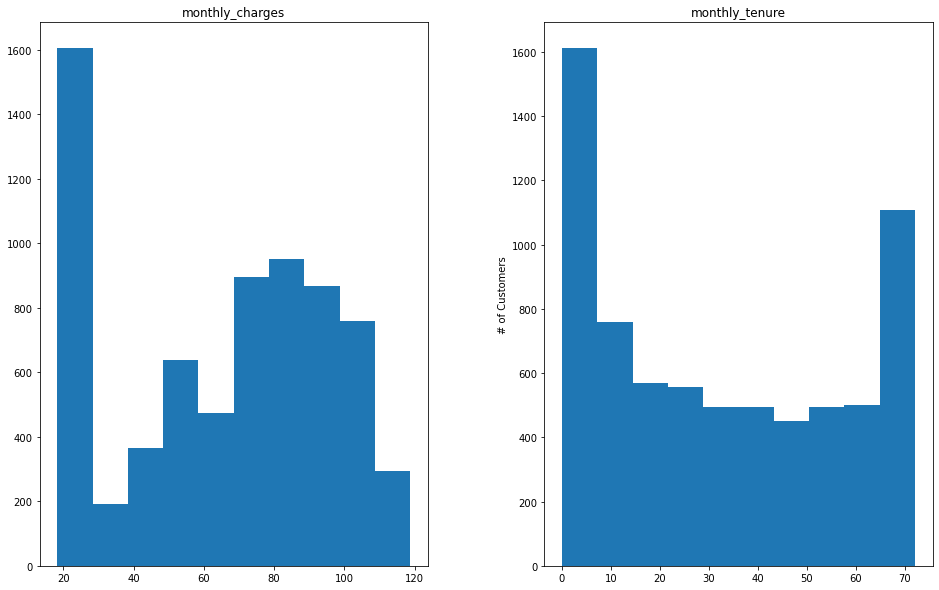

In [7]:
df.hist(figsize = (16, 10), grid = False, bins=10)
plt.ylabel('# of Customers')
plt.show()

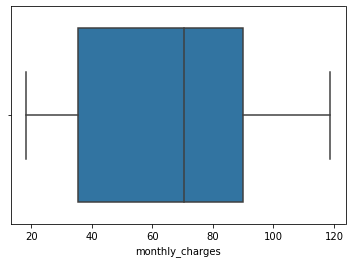

In [8]:
sns.boxplot(df.monthly_charges)
plt.show()

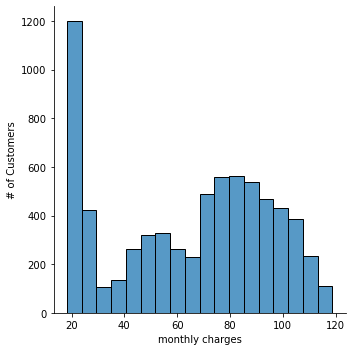

In [9]:
figsize = (20, 15)
sns.displot(df.monthly_charges)
plt.ylabel('# of Customers')
plt.xlabel('monthly charges')
plt.show()

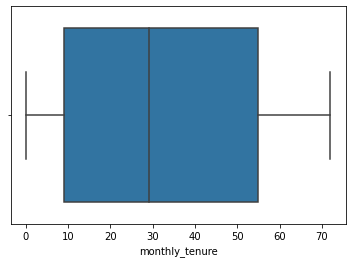

In [10]:
sns.boxplot(df.monthly_tenure)
plt.show()

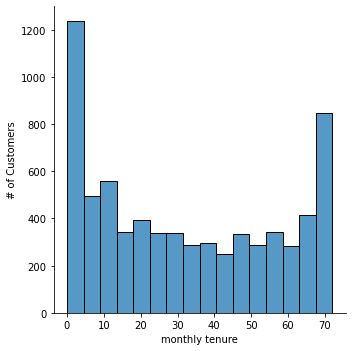

In [11]:
figsize = (20, 15)
sns.displot(df.monthly_tenure)
plt.ylabel('# of Customers')
plt.xlabel('monthly tenure')
plt.show()

# Observations
- Monthly Charges: Nearly 1600 customers have monthly charges < 30
- Monthly Charges: A bulk of the monthly charges are between 70-120
- Tenure: Spike at 5 months, which drops off with a loss of nearly 800 customers after that point.
- Tenure: Customers with over 65 months of tenure is second most common cateogry. 

** Removed Total Charges Per Exercise Instructions
- Total Charges: Nearly 4000 customers had total charges below 2000
- Total Charges: Number of customers declines as total_charges increase, perhaps a factor of churn

#### Hypothesize: Form and document your initial hypotheses about how the predictors (independent variables, features, or attributes) interact with the target (y-value or dependent variable).

Initial Questions to Consider
- Does the monthly charge amount impact tenure?
- Do people with higher monthly charges have less tenure?
- Do customers with lower monthly charges have greater tenure?
- What are the monthly charges for customers who stay with the company?
- What are the monthly charges fo customers who churn?

1. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [12]:
def train_validate_test_split(df, seed=123):
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed)
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed)
    
    print(f'train --> {train.shape}')
    print(f'validate --> {validate.shape}')
    print(f'test --> {test.shape}')
    
    return train, validate, test

In [13]:
train, validate, test = train_validate_test_split(df, seed=123)

train --> (3943, 3)
validate --> (1691, 3)
test --> (1409, 3)


2. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [14]:
# create a function that takes in a dataframe
def plot_variable_pairs(df):
    # plot the columns in a pairplot
    sns.pairplot(df, kind = 'reg', corner = True, plot_kws={'line_kws':{'color':'red'}})
    plt.show()

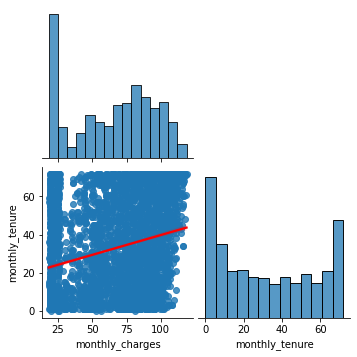

In [15]:
plot_variable_pairs(train)

3. Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.

In [38]:
# create a function that accepts
def months_to_years(df, target):
    # create a new column that takes tenure months and converts them to complete years
    df[target]= df.monthly_tenure // 12
    # return the dataframe
    return df

In [40]:
months_to_years(df, 'monthly_tenure')

,customer_id,monthly_charges,monthly_tenure,tenure_years
0,0002-ORFBO,65.60,0,0
1,0003-MKNFE,59.90,0,0
2,0004-TLHLJ,73.90,0,0
3,0011-IGKFF,98.00,1,1
4,0013-EXCHZ,83.90,0,0
...,...,...,...,...
7038,9987-LUTYD,55.15,1,1
7039,9992-RRAMN,85.10,1,1
7040,9992-UJOEL,50.30,0,0
7041,9993-LHIEB,67.85,5,5


4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [18]:
train, validate, test = train_validate_test_split(df, seed=123)

train --> (3943, 4)
validate --> (1691, 4)
test --> (1409, 4)


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 4604 to 6958
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      3943 non-null   object 
 1   monthly_charges  3943 non-null   float64
 2   monthly_tenure   3943 non-null   int64  
 3   tenure_years     3943 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 154.0+ KB


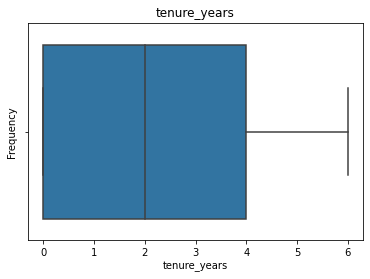

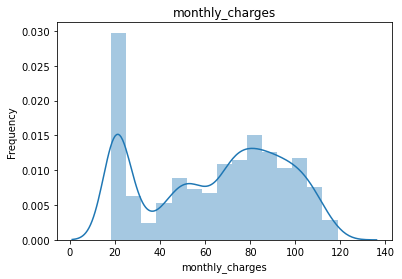

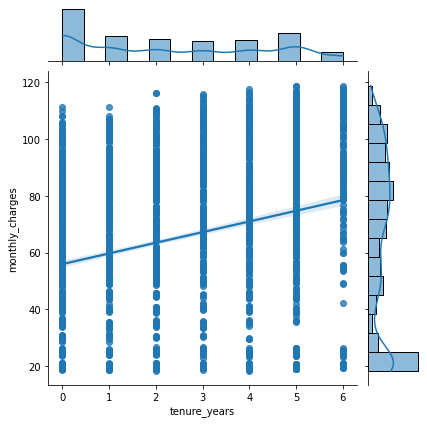

,customer_id,monthly_charges,monthly_tenure,tenure_years
4604,6490-FGZAT,20.65,6,0
5566,7841-FCRQD,53.75,33,2
6204,8777-MBMTS,105.85,65,5
5837,8212-CRQXP,80.00,22,1
1276,1897-OKVMW,90.60,64,5
...,...,...,...,...
1794,2619-WFQWU,70.15,1,0
817,1194-SPVSP,19.65,1,0
901,1309-BXVOQ,106.10,21,1
1987,2873-ZLIWT,84.85,40,3


In [20]:
explore.plot_categorical_and_continuous(train, 'tenure_years', 'monthly_charges')

5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

Done, as evidenced by number 4 above. 

6. Explore your dataset with any other visualizations you think will be helpful.

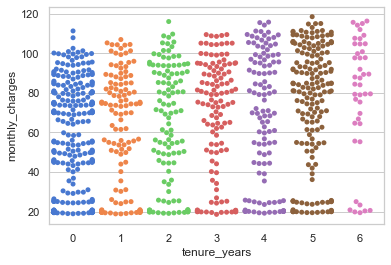

In [37]:
sns.swarmplot(x='tenure_years', y='monthly_charges', data=train.sample(1000))
plt.show()

7. In a seperate notebook, use the functions you have developed in this exercise with the mall_customers dataset in the Codeup database server. You will need to write a sql query to acquire your data. Make spending_score your target variable.

In [ ]:
# Done

# Exercises II - Challenge

## Zillow

Our Zillow scenario continues:

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. 

## Goal

- Your goal is to predict the values of single unit properties using the observations from 2017.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

Come up with some initial hypotheses based on your goal of predicting property value.

Visualize all combinations of variables in some way.

Run the appropriate statistical tests where needed.

What independent variables are correlated with the dependent variable, home value?

Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

In [21]:
# Scale Data

def scale_telco(train, validate, test, scaler_type = MinMaxScaler()):
    features_to_scale = ['monthly_charges', 'tenure']
    other_features = ['customer_id']
    target = 'total_charges'

    
    # establish empy dataframes for storing scaled datasets
    train_scaled = pd.DataFrame(index = train.index)
    validate_scaled = pd.DataFrame(index = validate.index)
    test_scaled = pd.DataFrame(index = test.index)
    
    # create and fit the scaler
    scaler = scaler_type.fit(train[features_to_scale])
    
    
    # adding scaled features to the scaled dataframes
    train_scaled[features_to_scale] = scaler.transform(train[features_to_scale])
    validate_scaled[features_to_scale] = scaler.transform(validate[features_to_scale])
    test_scaled[features_to_scale] = scaler.transform(test[features_to_scale])
    
    
    # adding features that are not scaled back to the dataframe. 
    
    train_scaled[other_features] = train[other_features]
    validate_scaled[other_features] = validate[other_features]
    test_scaled[other_features] = test[other_features]
    
    
    # adding target variable to the dataframe
    
    train_scaled[target] = (train[target])
    validate_scaled[target] = (validate[target])
    test_scaled[target] = (test[target])
    
    return train_scaled, validate_scaled, test_scaled
    